### 1. Load the data into the pandas environment and identify some basic details of the dataset.

In [1]:
import numpy as np
import pandas as pd

In [2]:
dt=pd.read_csv("employee.csv")

In [3]:
dt.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [4]:
dt.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [5]:
dt.dtypes

name                  object
age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


#### we have 3 columns with two null values in each columns which are age,income and gender .

### 2.Reset the index as "name".

In [7]:
dt.set_index(['name'])

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 3.elect rows for specific names Jack Morgan and Josh wills

In [8]:
dt.iloc[[2,7]]

,name,age,income,gender,department,grade,performance_score
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
7,Josh Wills,54.0,52000.0,F,Finance,G3,901


### 4.Select data for multiple values "Sales" and “Finance”.

In [9]:
mult_val=dt.iloc[np.where(dt.department.isin(['Sales','Finance']))]

In [10]:
mult_val

,name,age,income,gender,department,grade,performance_score
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


### 5.Display employee who has more than 700 performance score.

In [11]:
dt.loc[dt['performance_score']>700]

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


### 6.Display employee who has more than 500 and less than 700 performance score

In [12]:
dt.loc[(dt['performance_score']>500) & (dt['performance_score']<700)]

,name,age,income,gender,department,grade,performance_score
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


### 7. Check and handle missing values in the dataset.

In [13]:
dt.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

D:\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age Data')

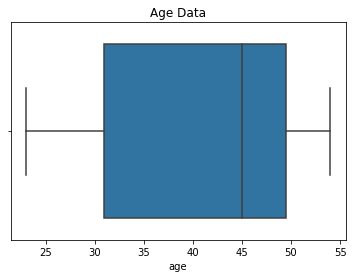

In [14]:
import seaborn as sns
sns.boxplot(dt['age']).set_title('Age Data')

D:\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Income Data')

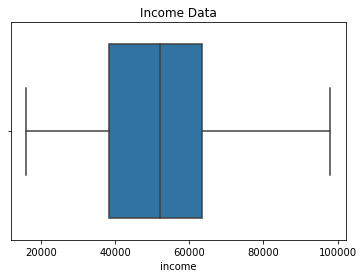

In [15]:
sns.boxplot(dt['income']).set_title('Income Data')

In [16]:
## since there are no outlying values in age,income data we will fill the 
## null values in these columns with their respective means.
## In gender column we will fill null values with mode value

In [17]:
mean_age=dt['age'].mean()

In [18]:
dt['age'].fillna(value=mean_age,inplace=True)

In [19]:
mean_in=dt['income'].mean()
dt['income'].fillna(value=mean_in,inplace=True)

In [20]:
mode_val=dt['gender'].mode()
mode_val

0    F
Name: gender, dtype: object

In [21]:
dt['gender'].fillna(value='F',inplace=True)

In [22]:
dt.isna().sum()

name                 0
age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

### 8 . Check the outliers and handle outliers in performance score using Percentiles.

In [23]:
dt['performance_score'].quantile([0.25,0.5,0.75])

0.25    556.0
0.50    674.0
0.75    711.0
Name: performance_score, dtype: float64

D:\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Performance score data')

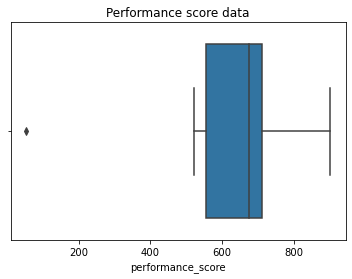

In [24]:
import seaborn as sns
sns.boxplot(dt['performance_score']).set_title('Performance score data')

In [25]:
q1=np.percentile(dt['performance_score'],25,interpolation='midpoint')
q3=np.percentile(dt['performance_score'],75,interpolation='midpoint')
iqr=q3-q1
lo_lim=q1 - 1.5 * iqr
up_lim=q3 + 1.5 * iqr
print('lower limit=',lo_lim)
print('upper limit=',up_lim)

lower limit= 323.5
upper limit= 943.5


In [26]:
outliers=[]
for i in dt['performance_score']:
    if (i<lo_lim) or (i>up_lim):
       outliers.append(i)
print('outliers are')
for x in outliers:
    print(dt[dt['performance_score']==x])

outliers are
           name   age        income gender  department grade  \
6  James Authur  54.0  52857.142857      F  Operations    G3   

   performance_score  
6                 53  


In [27]:
dt['performance_score']=dt['performance_score'].replace(53,lo_lim)

In [28]:
dt

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.000000,52857.142857,F,Operations,G3,723.0
1,S Kumar,40.428571,16000.000000,F,Finance,G0,520.0
2,Jack Morgan,32.000000,35000.000000,M,Finance,G2,674.0
3,Ying Chin,45.000000,65000.000000,F,Sales,G3,556.0
4,Dheeraj Patel,30.000000,42000.000000,F,Operations,G2,711.0
5,Satyam Sharma,40.428571,62000.000000,F,Sales,G3,649.0
6,James Authur,54.000000,52857.142857,F,Operations,G3,323.5
7,Josh Wills,54.000000,52000.000000,F,Finance,G3,901.0
8,Leo Duck,23.000000,98000.000000,M,Sales,G4,709.0


### 9. Check the gender column and do Dummy encoding. 

In [29]:
dummy_gen=pd.get_dummies(dt['gender'],drop_first=True)

In [30]:
dt=pd.merge(left=dt,right=dummy_gen,left_index=True,right_index=True)

In [31]:
dt.drop(labels='gender',axis=1)

,name,age,income,department,grade,performance_score,M
0,Allen Smith,45.000000,52857.142857,Operations,G3,723.0,0
1,S Kumar,40.428571,16000.000000,Finance,G0,520.0,0
2,Jack Morgan,32.000000,35000.000000,Finance,G2,674.0,1
3,Ying Chin,45.000000,65000.000000,Sales,G3,556.0,0
4,Dheeraj Patel,30.000000,42000.000000,Operations,G2,711.0,0
5,Satyam Sharma,40.428571,62000.000000,Sales,G3,649.0,0
6,James Authur,54.000000,52857.142857,Operations,G3,323.5,0
7,Josh Wills,54.000000,52000.000000,Finance,G3,901.0,0
8,Leo Duck,23.000000,98000.000000,Sales,G4,709.0,1


### 10.Do the standard scaling on the feature performance score. 

In [32]:
## Feature scaling is a method used to normalize the range of independent variables or features of data.AKA data normalization

In [33]:
## standard scaler helps to get standardized distribution with a zero mean and standard deviation of one(unit variance)

In [34]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
df_scaled=std_scaler.fit_transform(dt[['income','performance_score']].to_numpy())
df_scaled=pd.DataFrame(df_scaled,columns=['income','performance_score'])
df_scaled

,income,performance_score
0,0.000000,0.541644
1,-1.734284,-0.794729
2,-0.840254,0.219072
3,0.571373,-0.557736
4,-0.510874,0.462647
5,0.430210,0.054494
6,0.000000,-2.088312
7,-0.040332,1.713440
8,2.124162,0.449481


In [35]:
dt.loc[:,['performance_score']]=df_scaled[['performance_score']]

In [36]:
dt

,name,age,income,gender,department,grade,performance_score,M
0,Allen Smith,45.000000,52857.142857,F,Operations,G3,0.541644,0
1,S Kumar,40.428571,16000.000000,F,Finance,G0,-0.794729,0
2,Jack Morgan,32.000000,35000.000000,M,Finance,G2,0.219072,1
3,Ying Chin,45.000000,65000.000000,F,Sales,G3,-0.557736,0
4,Dheeraj Patel,30.000000,42000.000000,F,Operations,G2,0.462647,0
5,Satyam Sharma,40.428571,62000.000000,F,Sales,G3,0.054494,0
6,James Authur,54.000000,52857.142857,F,Operations,G3,-2.088312,0
7,Josh Wills,54.000000,52000.000000,F,Finance,G3,1.713440,0
8,Leo Duck,23.000000,98000.000000,M,Sales,G4,0.449481,1
